## Import de libraries necessárias

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
#obtendo os dados
df = pd.read_csv("StudentsPerformance.csv")

In [3]:
#vendo os dados
df.head(6)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78


In [4]:
#colunas dos dados
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [5]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


<AxesSubplot:>

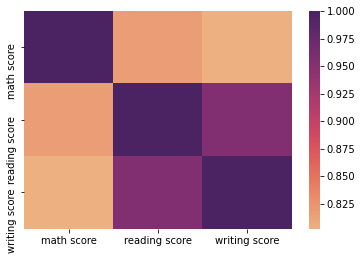

In [26]:
sns.heatmap(df.corr(),cmap="flare")

In [6]:
df["test preparation course"].value_counts()

none         642
completed    358
Name: test preparation course, dtype: int64

In [7]:
df["lunch"].value_counts()

standard        645
free/reduced    355
Name: lunch, dtype: int64

In [8]:
df["parental level of education"].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

In [9]:
groups = df["race/ethnicity"].value_counts()

([<matplotlib.patches.Wedge at 0x18f94c79f28>,
 [Text(0.592324332246979, 0.9269044640242977, 'group C'),
  Text(-1.0461621742897658, 0.3399186742226879, 'group D'),
  Text(-0.49322154359063347, -0.9832255636109514, 'group B'),
  Text(0.5952333666001212, -0.9250390474384775, 'group E'),
  Text(1.057281962489778, -0.3035701760610943, 'group A')],
 [Text(0.3230859994074431, 0.5055842531041623, '31.9'),
  Text(-0.5706339132489631, 0.18541018593964795, '26.2'),
  Text(-0.2690299328676182, -0.5363048528787007, '19.0'),
  Text(0.32467274541824787, -0.5045667531482604, '14.0'),
  Text(0.5766992522671516, -0.1655837323969605, '8.9')])

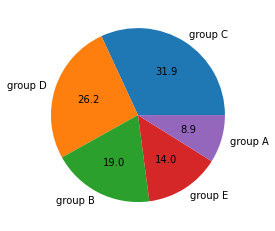

In [10]:
fig,ax = plt.subplots()
ax.pie(groups,labels=groups.index,autopct="%1.1f")

In [11]:
groups

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

In [12]:
df.corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


In [13]:
from sklearn.preprocessing import LabelEncoder
colunas_categorizar = ['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course']
lbl_enc = LabelEncoder()
df_categorized = df.copy()
for coluna in colunas_categorizar:
    lbl_enc.fit(df[coluna])
    df_categorized[coluna] = lbl_enc.transform(df[coluna])

In [14]:
df_categorized.head(8)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,1,1,1,1,72,72,74
1,0,2,4,1,0,69,90,88
2,0,1,3,1,1,90,95,93
3,1,0,0,0,1,47,57,44
4,1,2,4,1,1,76,78,75
5,0,1,0,1,1,71,83,78
6,0,1,4,1,0,88,95,92
7,1,1,4,0,1,40,43,39


<AxesSubplot:>

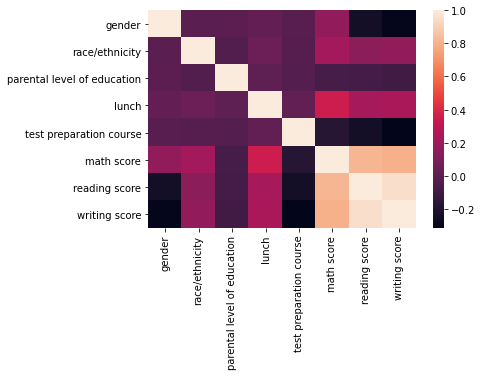

In [15]:
sns.heatmap(df_categorized.corr())

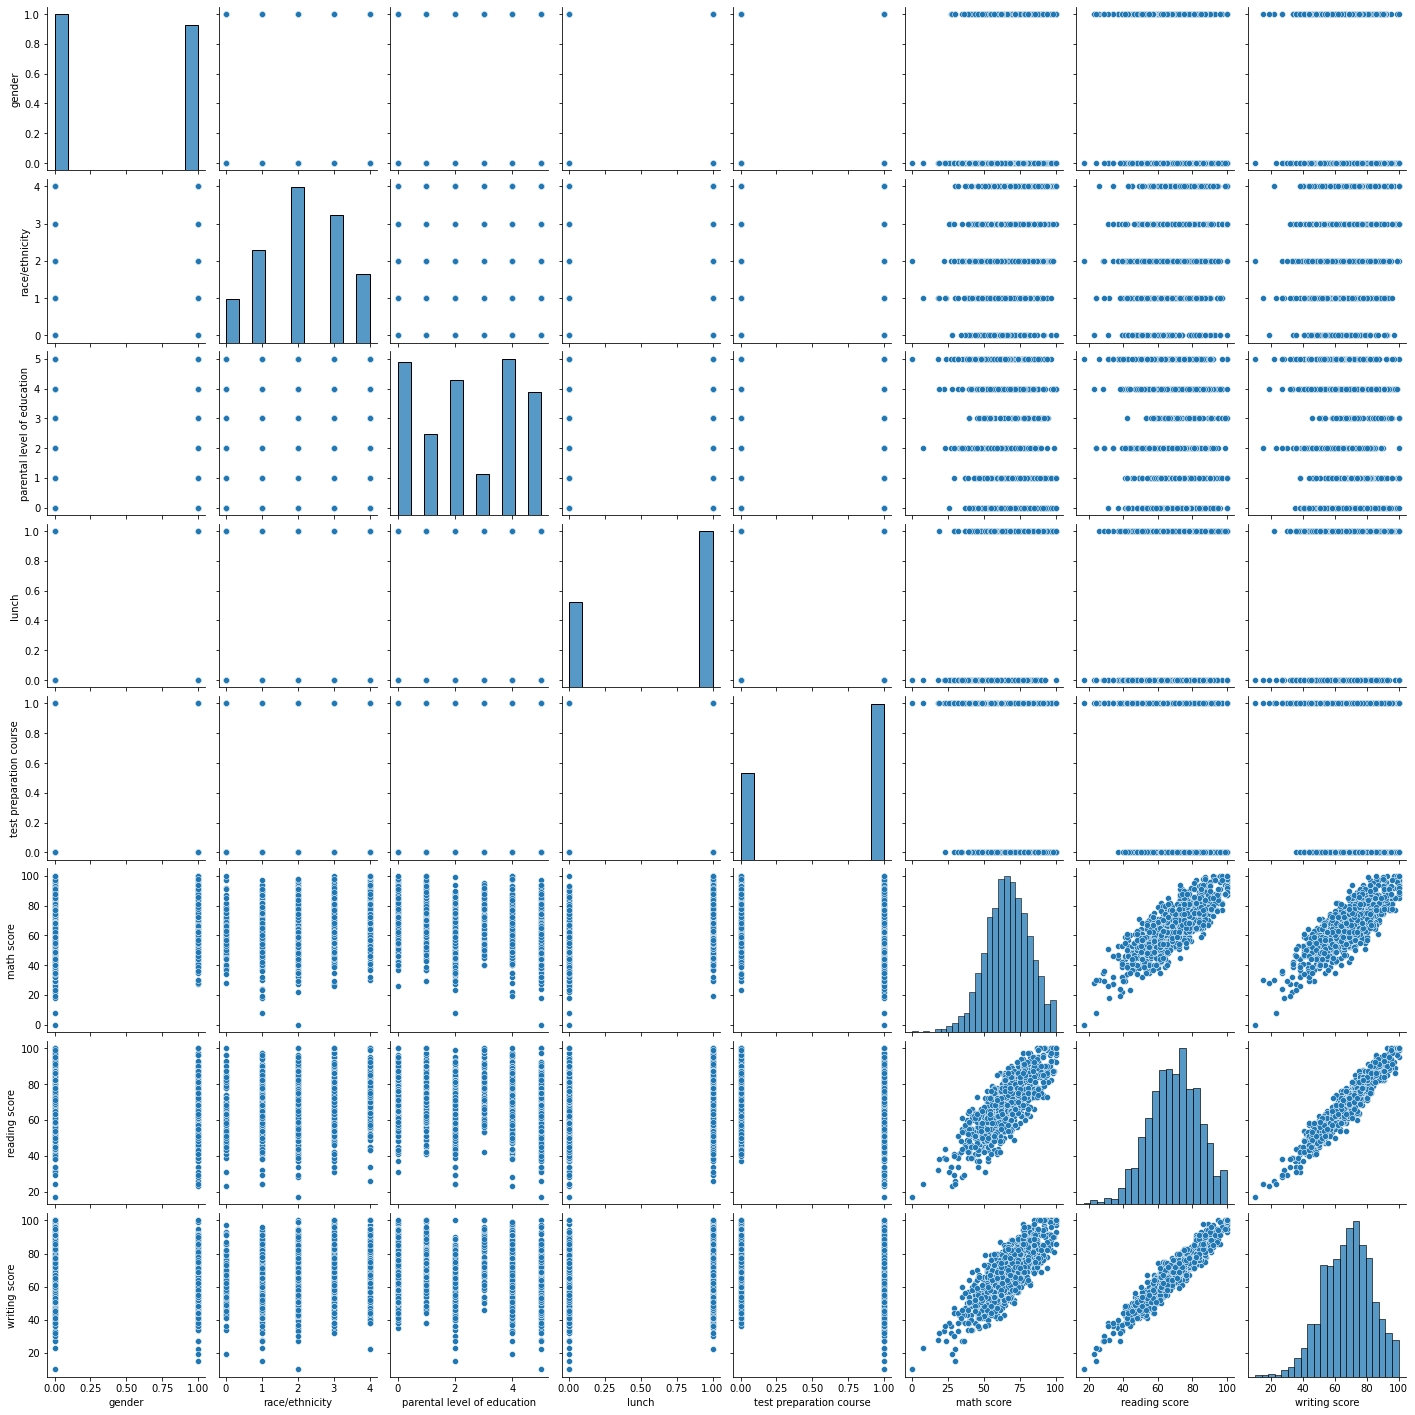

In [16]:
sns.pairplot(df_categorized)

In [17]:
from lazypredict.Supervised import LazyRegressor
from sklearn.model_selection import train_test_split
import numpy as np

materias = ["math score","reading score","writing score"]
df_categorized_math = df_categorized.drop(["reading score","writing score"],axis=1)
x_train,x_test,y_train,y_test = train_test_split(df_categorized_math.drop("math score",axis=1),df_categorized_math["math score"],train_size=0.7)

D:\Anaconda\envs\curso_mit\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [18]:
lazy_reg = LazyRegressor()
models,predictions = lazy_reg.fit(x_train,x_test,y_train,y_test)

100%|██████████| 42/42 [00:03<00:00, 11.20it/s]


In [19]:
print(models)

                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
HuberRegressor                               0.16       0.17 13.32        0.03
ElasticNetCV                                 0.16       0.17 13.33        0.16
BayesianRidge                                0.16       0.17 13.33        0.04
RidgeCV                                      0.16       0.17 13.34        0.03
SGDRegressor                                 0.16       0.17 13.34        0.03
Ridge                                        0.16       0.17 13.35        0.02
LassoCV                                      0.16       0.17 13.35        0.09
Lars                                         0.16       0.17 13.35        0.02
LinearRegression                             0.16       0.17 13.35        0.01
LassoLarsIC                                  0.16       0.17 13.35        0.01
TransformedTargetRegressor                   0.16   

In [20]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)
print(lin_reg.score(x_test,y_test))

0.17089822427249102


In [21]:
lin_reg.coef_

array([ 5.33847901,  2.37085806, -0.50151103, 11.45873596, -6.38392513])

In [22]:
df_categorized_math.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score'],
      dtype='object')

In [24]:
for coluna in colunas_categorizar:
    print(df[coluna].unique())

['female' 'male']
['group B' 'group C' 'group A' 'group D' 'group E']
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
['standard' 'free/reduced']
['none' 'completed']


In [37]:
data_for_model = pd.get_dummies(df)

In [38]:
data_for_model = data_for_model.drop(["math score","reading score","writing score"],axis=1)
data_for_model

,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1
1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0
2,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1
3,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1
4,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0
996,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1
997,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0
998,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0


In [39]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [41]:
y = ((df["math score"]+df["reading score"]+df["writing score"]))/3
x_train,x_test,y_train,y_test = train_test_split(data_for_model,y,test_size=0.3)

In [60]:
from sklearn.ensemble import RandomForestRegressor
rnd_forest = RandomForestRegressor()
rnd_forest.fit(x_train,y_train)

RandomForestRegressor()

In [61]:
importancia_features = np.array(rnd_forest.feature_importances_)
nome_features = data_for_model.columns
dados = {"nome_features":nome_features,"importancia_features":importancia_features}

In [62]:
dados_df = pd.DataFrame(dados)
dados_df.sort_values(by=["importancia_features"],ascending=False,inplace=True)

<AxesSubplot:xlabel='importancia_features', ylabel='nome_features'>

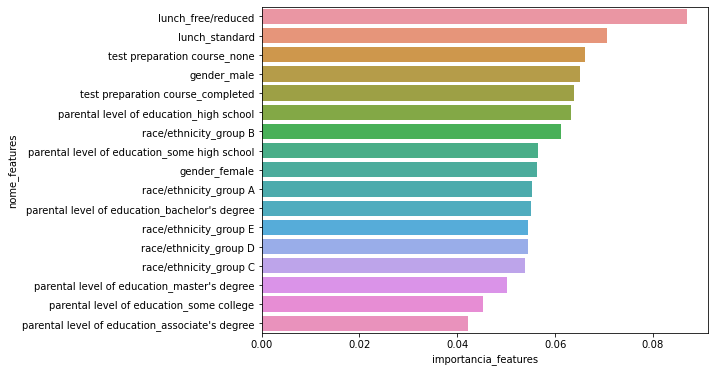

In [69]:
plt.figure(figsize=(8,6))
sns.color_palette("husl", 9)
sns.barplot(x=dados_df['importancia_features'], y=dados_df['nome_features'])

In [70]:
lazy_reg = LazyRegressor()
models,predictions = lazy_reg.fit(x_train,x_test,y_train,y_test)
print(models)

100%|██████████| 42/42 [00:03<00:00, 10.99it/s]


                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
ElasticNetCV                                 0.14       0.19 12.32        0.06
BayesianRidge                                0.14       0.19 12.34        0.01
LassoCV                                      0.14       0.19 12.34        0.07
SGDRegressor                                 0.14       0.19 12.35        0.01
RidgeCV                                      0.14       0.19 12.36        0.01
HuberRegressor                               0.14       0.19 12.36        0.04
Ridge                                        0.14       0.18 12.37        0.01
TransformedTargetRegressor                   0.13       0.18 12.37        0.01
LinearRegression                             0.13       0.18 12.37        0.00
PoissonRegressor                             0.13       0.18 12.38        0.01
OrthogonalMatchingPursuitCV                  0.13   